In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
# Read the csv file into a pandas DataFrame

meat = pd.read_csv('Resources/meat_consumption.csv')
meat.head()

,Year,Beef_Veal,Lamb_Mutton,Pig,Chicken
0,1974,63,25,10,12
1,1975,67,22,10,13
2,1976,69,18,10,14
3,1977,67,18,11,15
4,1978,57,18,10,17


In [11]:
# Assign the data to X and y

X = meat[["Beef_Veal", "Lamb_Mutton", "Pig", "Chicken"]]
y = meat["Year"].values.reshape(-1, 1)
print(X.shape, y.shape)

(44, 4) (44, 1)


In [16]:
plt.scatter(X, y)

ValueError: x and y must be the same size

In [12]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

### END SOLUTION

In [13]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [14]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9831170894276309
Testing Score: 0.9816228999022345


Text(0.5, 1.0, 'Residual Plot')

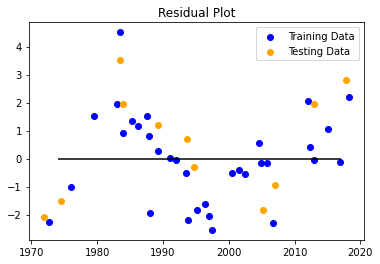

In [15]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION